In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np


In [84]:
#Keys for best data (not yet known for certain, placeholders for now)
norm_key = norm_key= 'N_6H'
raw_key = '6DB_m5.0eps8000'

In [85]:
def best_locations (norm_key, raw_key):
    '''Input: dictionary keys for accessing the cluster labels for the best raw and normalized clusterings
    Output: dictionary with the location and label data for the best clusterings'''

    norm = pd.read_csv('C:/Users/Administrator/Desktop/Merge_Norm.csv')
    raw = pd.read_csv('C:/Users/Administrator/Desktop/Merge_Raw.csv')
    
    with open('C:/Users/Administrator/Desktop/Norm_Plant_Clusters.p', 'rb') as f:
        norm_dict = pickle.load(f)
    
    with open('C:/Users/Administrator/Desktop/Raw_Plant_Clusters.p', 'rb') as f:
        raw_dict = pickle.load(f)

    norm = norm[['plantCode', 'Longitude', 'Latitude', 'state']]
    raw = raw[['plantCode', 'Longitude', 'Latitude', 'state']]

    norm_location = pd.merge(left=norm, right=norm_dict[norm_key], how='left', left_on='plantCode', right_on='plantCode').dropna()
    raw_location = pd.merge(left=raw, right=raw_dict[raw_key], how='left', left_on='plantCode', right_on='plantCode')


    return norm_location, raw_location

In [86]:
#norm and raw are dfs with results with gas consumption data (for line graph visuals)
#norm_location and raw_location are the raw and normalized results with just location info and labels
#(for location visuals)
norm_location, raw_location =  best_locations (norm_key, raw_key)
norm_location

,plantCode,Longitude,Latitude,state,N_0,N_1,N_2,N_3,N_4,N_5
0,57950,-82.619167,43.266389,MI,0.0,1.0,0.0,0.0,0.0,0.0
1,57949,-83.447222,43.741111,MI,1.0,0.0,0.0,0.0,0.0,0.0
2,54867,-86.644300,46.409400,MI,0.0,1.0,0.0,0.0,0.0,0.0
3,58427,-84.551667,42.719722,MI,0.0,1.0,0.0,0.0,0.0,0.0
4,62192,-82.479331,42.773716,MI,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
497,50466,-83.525300,30.068800,FL,0.0,1.0,0.0,0.0,0.0,0.0
499,10275,-81.600600,27.911400,FL,0.0,1.0,0.0,0.0,0.0,0.0
500,7699,-81.849446,27.746369,FL,0.0,1.0,0.0,0.0,0.0,0.0
501,10062,-80.356600,25.835600,FL,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
raw_location

,plantCode,Longitude,Latitude,state,0,1,2,3,4,5
0,57950,-82.619167,43.266389,MI,1.0,0.0,0.0,0.0,0.0,0.0
1,57949,-83.447222,43.741111,MI,1.0,0.0,0.0,0.0,0.0,0.0
2,54867,-86.644300,46.409400,MI,1.0,0.0,0.0,0.0,0.0,0.0
3,58427,-84.551667,42.719722,MI,1.0,0.0,0.0,0.0,0.0,0.0
4,62192,-82.479331,42.773716,MI,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
498,50858,-82.340469,27.954901,FL,0.0,1.0,0.0,0.0,0.0,0.0
499,10275,-81.600600,27.911400,FL,1.0,0.0,0.0,0.0,0.0,0.0
500,7699,-81.849446,27.746369,FL,1.0,0.0,0.0,0.0,0.0,0.0
501,10062,-80.356600,25.835600,FL,1.0,0.0,0.0,0.0,0.0,0.0


# Start of AP code

In [87]:
from matplotlib.lines import Line2D
import geopandas as gpd

In [88]:
# input: the power plant location and category data
def plot_plant_categories(location_df):
    # color list
    color_list = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'cyan', 'lime', 'plum', 'lightsteelblue', 'black']

    # marker shape list
    marker_shape_list = ['o', 'v', '^', 's', 'P', '*', 'X', 'D', '<', '>', 'x']

    # get the whole US geodataframe
    usa_gdf = gpd.read_file('C:/Users/Administrator/Desktop/s_05mr24')

    # get the list of states we're doing
    statelist = location_df['state'].unique()
    
    for state in statelist:
        # get the geodataframe for this state
        state_gdf = usa_gdf.loc[usa_gdf['STATE'] == state]
    
        # get the power plants for this state
        state_power_plants = location_df.loc[location_df['state'] == state]
        
        # set up the plot
        my_fig, my_ax = plt.subplots(figsize=(10,10))
        my_ax.set_title('Natural Gas Plants', fontdict={'fontsize': '16'})

        # There are four columns before the categories start
        # So the categories are from column index [4] through to the end
        i = 0
        category_list = []
        num_categories = len(state_power_plants.columns[4:])
        for category in state_power_plants.columns[4:]:
            state_cat_df = state_power_plants.loc[state_power_plants[category] == 1.0]
            if (len(state_cat_df) > 0):
                category_list.append(category)
                state_cat_gdf = gpd.GeoDataFrame(state_cat_df,
                                                 geometry=gpd.points_from_xy(state_cat_df.Longitude, state_cat_df.Latitude))
                state_cat_gdf.plot(ax=my_ax, color=color_list[i], marker=marker_shape_list[i], alpha=0.8)
            if i < 9:
                i = i+1

        # draw the state map
        state_gdf.plot(ax=my_ax, color='None', edgecolor='black')
    
        # create the legend
        legend = my_ax.legend(category_list, \
                              title='Legend', fontsize=12, \
                              bbox_to_anchor=(1.0, 1.0))
        plt.setp(legend.get_title(), fontsize=12)

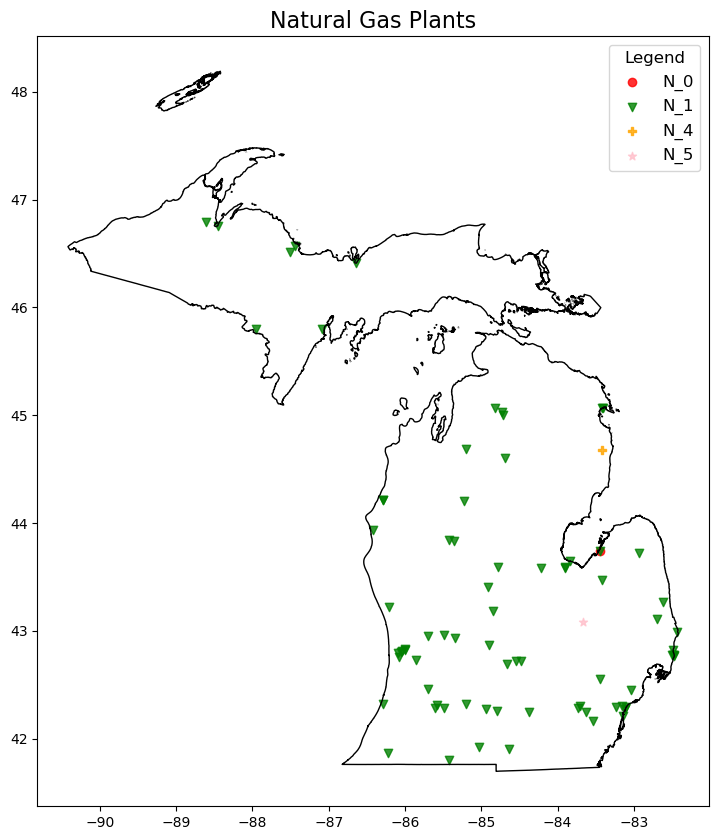

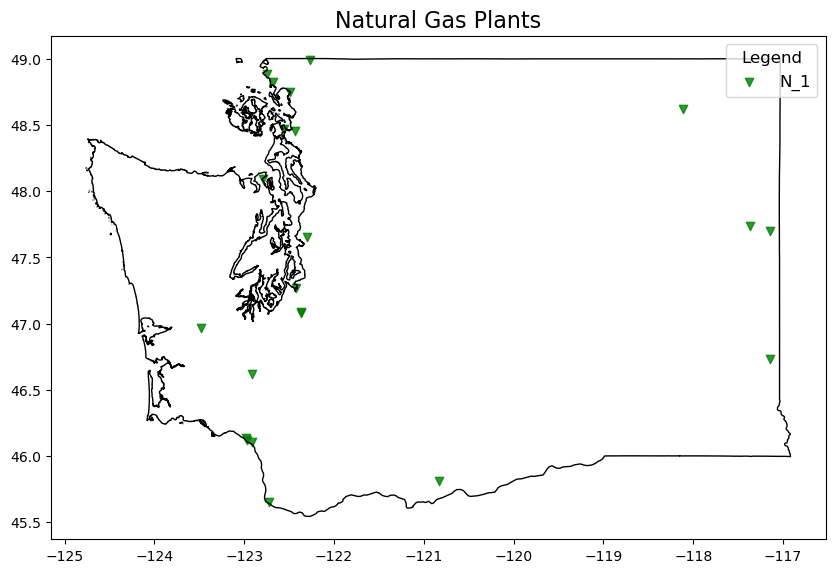

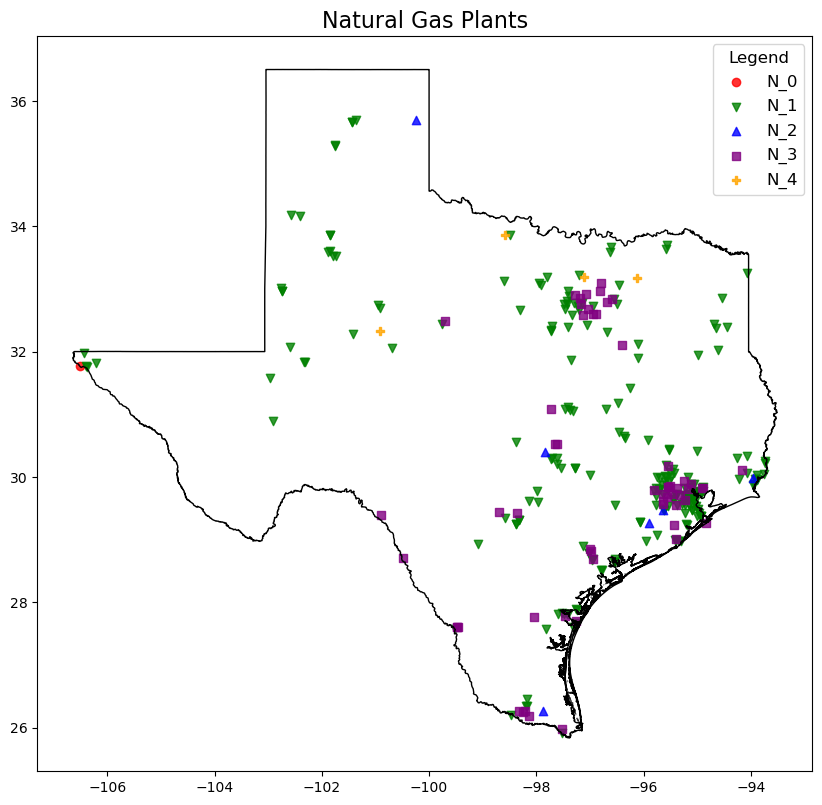

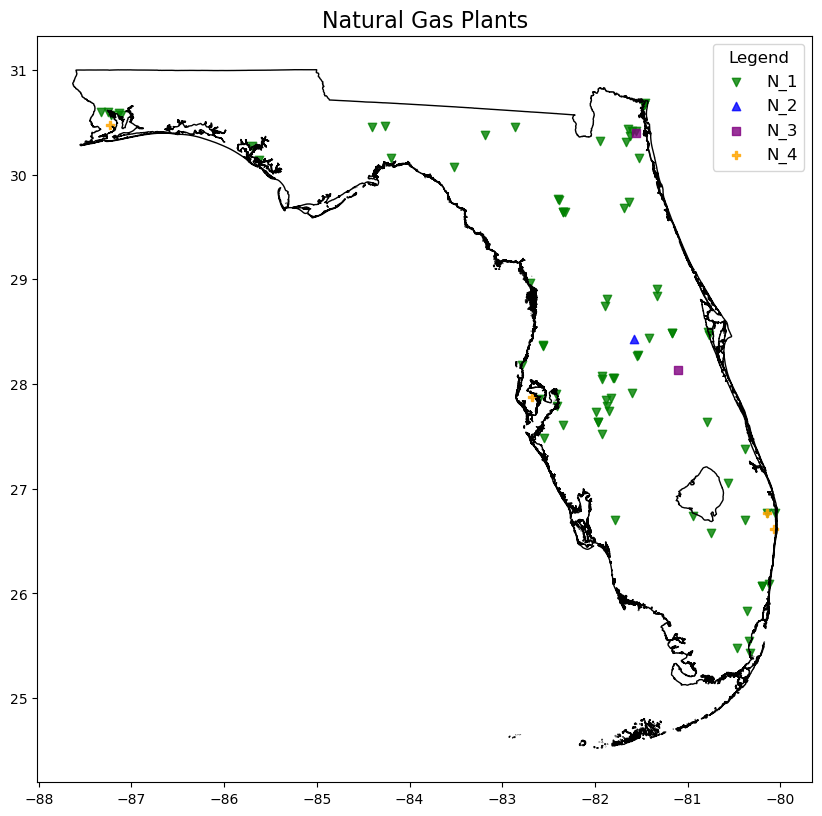

In [89]:
plot_plant_categories(norm_location)

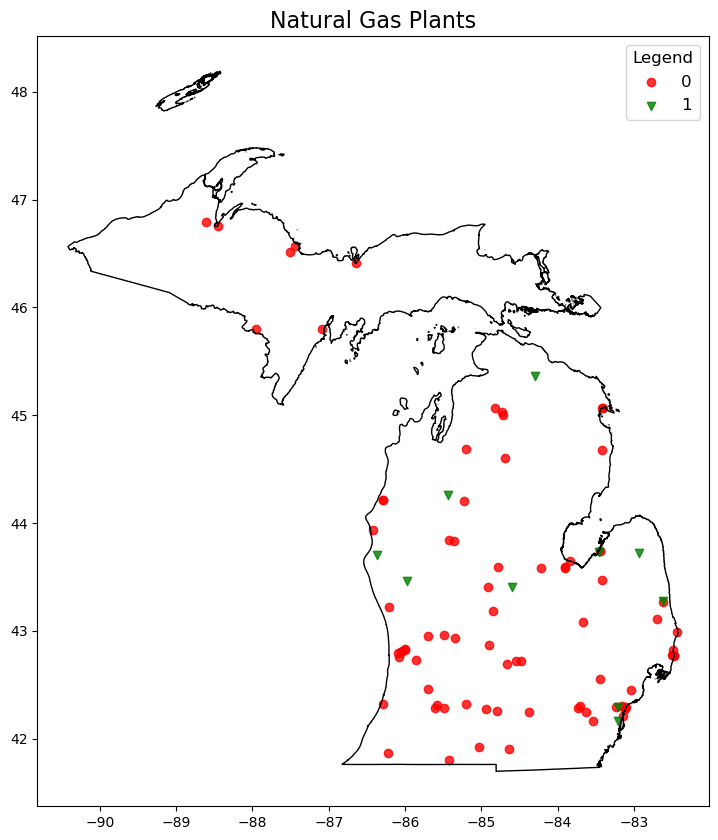

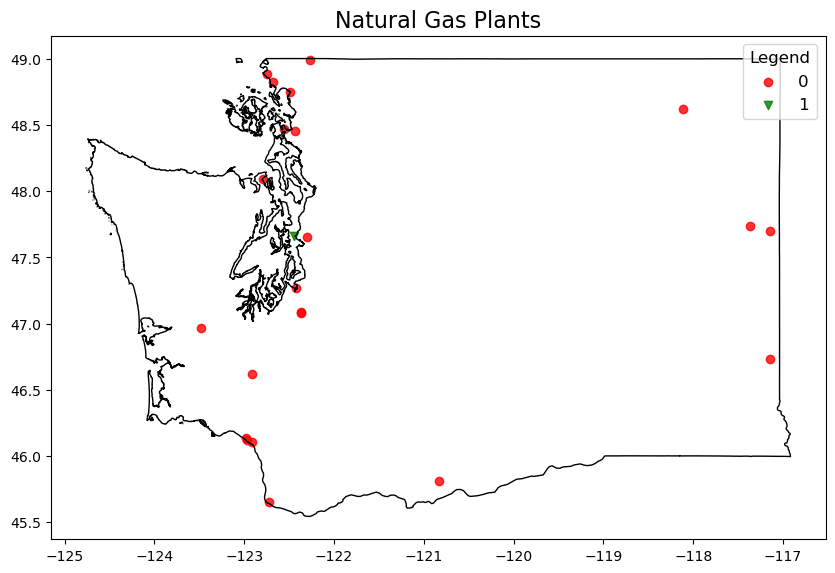

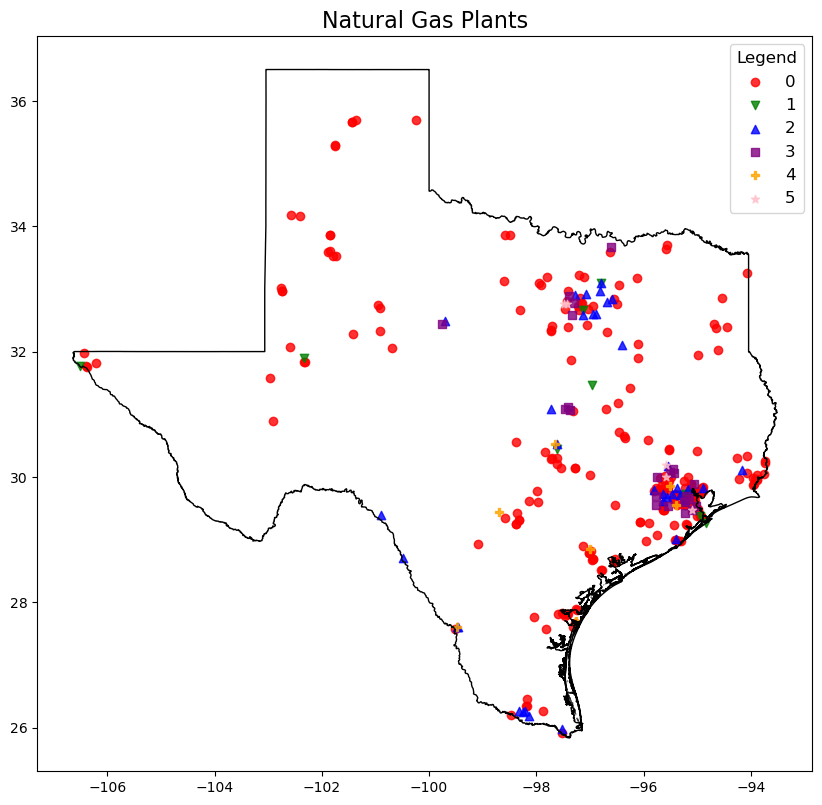

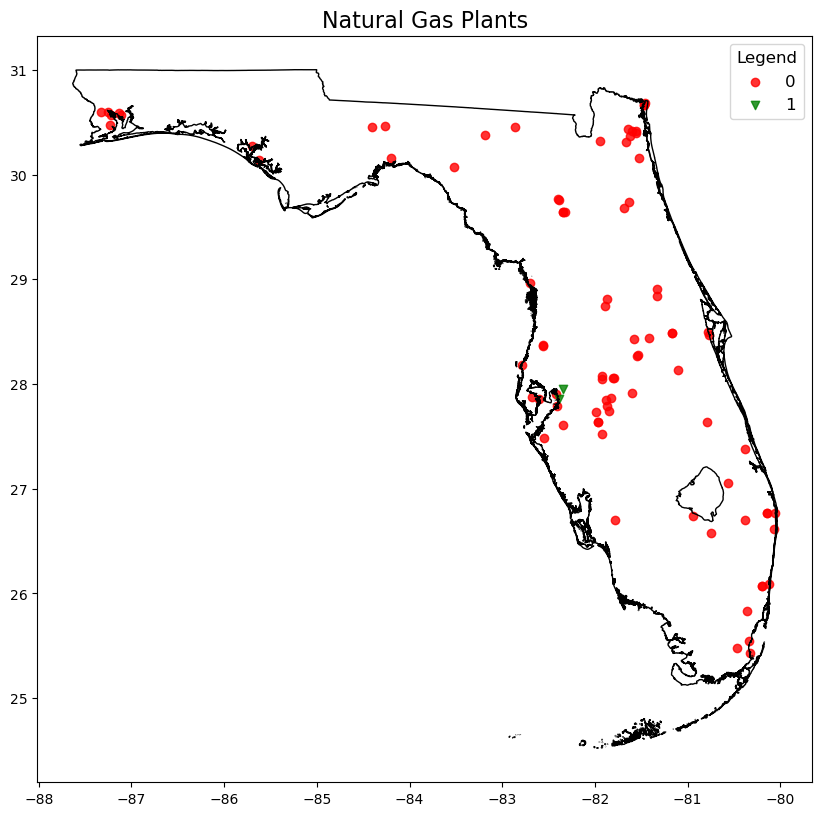

In [90]:
plot_plant_categories(raw_location)